<a href="https://colab.research.google.com/github/xs2445/Algorithms/blob/main/BinaryTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BinaryTree


| Idx | Difficulty | Title |
|-----|-----|-----|
|94|E|Binary Tree Inorder Traversal|
|101|E|Symmetric Tree|
|102|M|Binary Tree Level Order Traversal|
|104|E|Maximum Depth of Binary Tree|
|105|M|Construct Binary Tree from Preorder and Inorder Traversal|
|114|M|Flatten Binary Tree to Linked List|
|236|M|Lowest Common Ancestor of a Binary Tree|
|543|E|Diameter of Binary Tree|

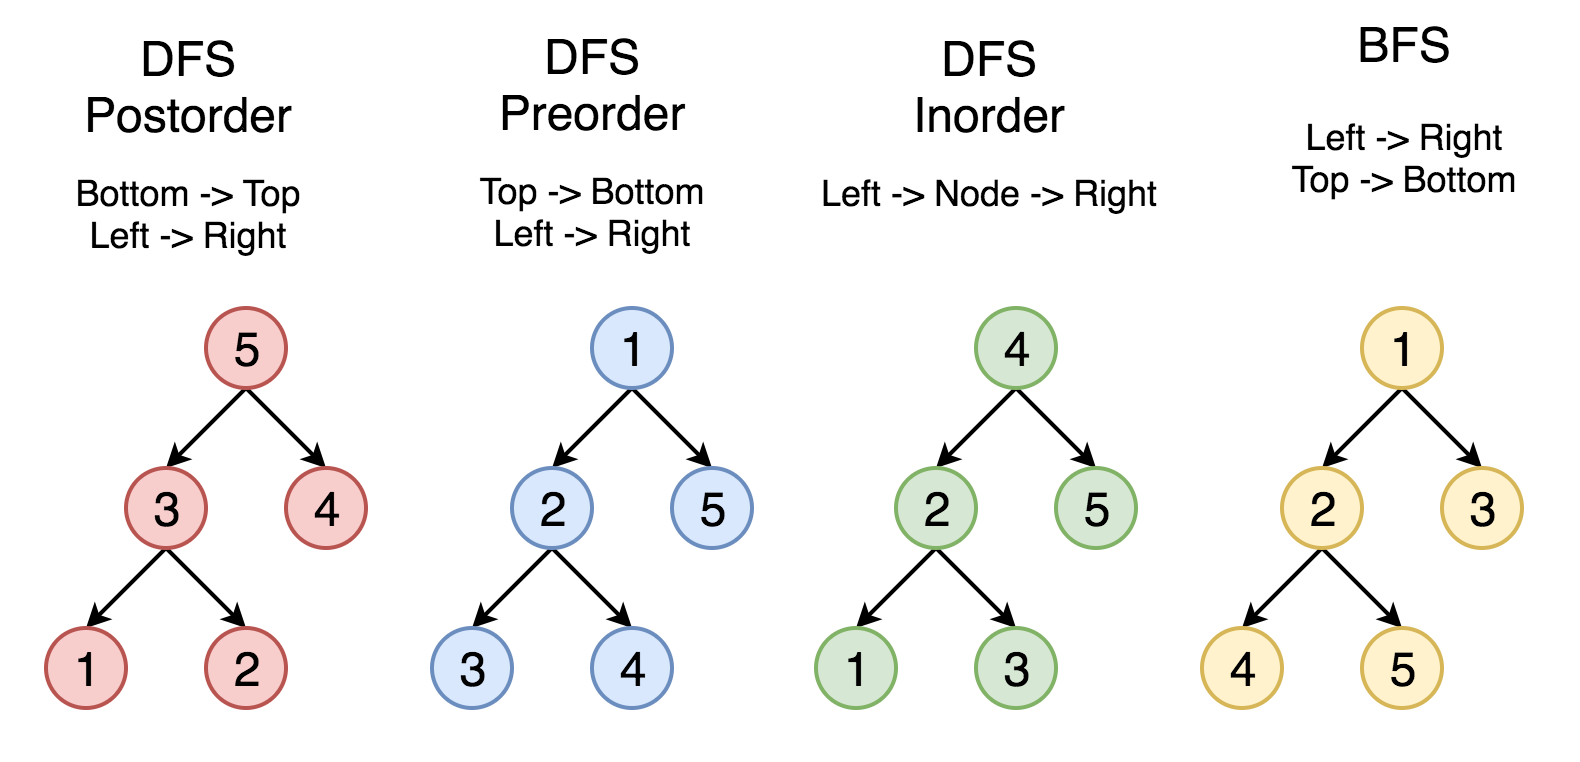

## 94 E Binary Tree Inorder Traversal

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def inorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        res = []
        def helper(root):
            if not root:
                return
            helper(root.left)
            res.append(root.val)
            helper(root.right)
            
        helper(root)
        return res
        

101 E Symmetric Tree

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def isSymmetric(self, root: Optional[TreeNode]) -> bool:
        def helper(left, right):
            # both are None
            if not left and not right:
                return True
            if left and right and left.val == right.val:
                left_sym = helper(left.left, right.right)
                right_sym = helper(left.right, right.left)
                if left_sym == right_sym == True:
                    return True
            return False
        return helper(root.left, root.right)
            
        

## 102 M Binary Tree Level Order Traversal

In [ ]:
a = []
a.append([])

a.append([])
a[0].append(1)

print(a)

[[1], []]


In [ ]:
a = [0]
a.append(1)
print(a)
a = [0,]
a.append(1)
print(a)

[0, 1]
[0, 1]


In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right

# # recursion --- DFS preorder
# class Solution:
#     def levelOrder(self, root: Optional[TreeNode]) -> List[List[int]]:
#         res = []
#         def helper(root, level):
#             if not root:
#                 return
#             if len(res) <= level:
#                 res.append([])
#             res[level].append(root.val)
#             helper(root.left, level+1)
#             helper(root.right, level+1)
#         helper(root, 0)
#         return res

# # Iteratively --- BFS
# class Solution:
#     def levelOrder(self, root: Optional[TreeNode]) -> List[List[int]]:
#         res = []
#         if not root:
#             return res
#         level = 0
#         # FIFO
#         queue = deque([root, ])
#         while queue:
#             res.append([])
#             level_length = len(queue)
#             for i in range(level_length):
#                 # pop every nodes in this layer
#                 node = queue.popleft()
#                 res[level].append(node.val)
#                 # add every children nodes to the tail of the queue
#                 if node.left:
#                     queue.append(node.left)
#                 if node.right:
#                     queue.append(node.right)
#             level += 1
#         return res
                
        
class Solution:
    def levelOrder(self, root: Optional[TreeNode]) -> List[List[int]]:
        res = []
        if not root:
            return res
        qnode = deque([root])
        level = 0
        while qnode:
            res.append([])
            # nodes in current layer
            n_nodes = len(qnode)
            for _ in range(n_nodes):
                node = qnode.popleft()
                res[level].append(node.val)
                if node.left:
                    qnode.append(node.left)
                if node.right:
                    qnode.append(node.right)
            level += 1
            
        return res
        

## 104 E Maximum Depth of Binary Tree

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
# class Solution:
#     def maxDepth(self, root: Optional[TreeNode]) -> int:
        
#         if not root:
#             return 0
#         else:
#             left_height = self.maxDepth(root.left)
#             right_height = self.maxDepth(root.right)
#             return max(left_height, right_height) + 1
        
#         return max_level
    
class Solution:
    def maxDepth(self, root: Optional[TreeNode]) -> int:
        def dfs(root, depth):
            if not root: return depth
            return max(dfs(root.left, depth + 1), dfs(root.right, depth + 1))
                       
        return dfs(root, 0)
        
        

## 105 M Construct Binary Tree from Preorder and Inorder Traversal

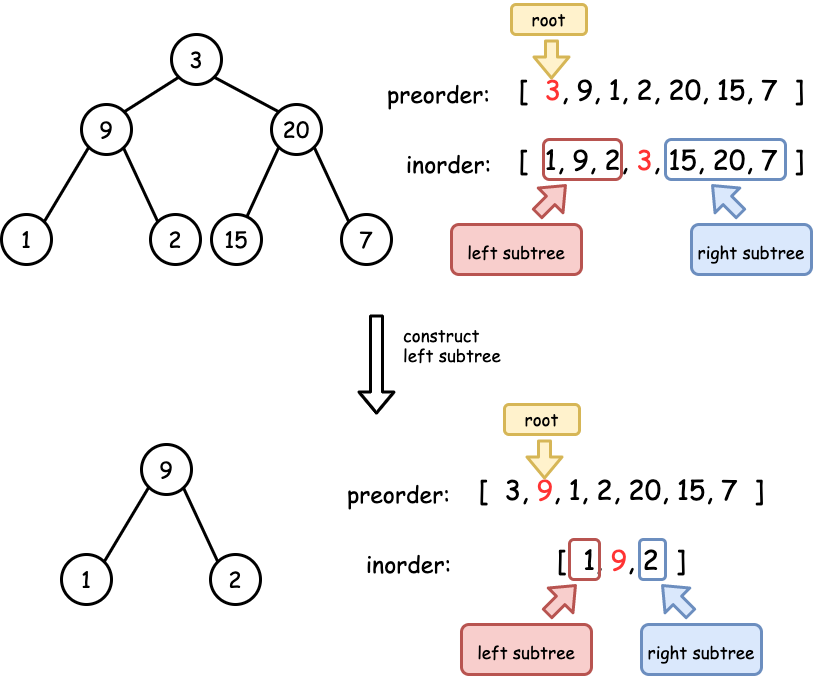

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right

# recursion
# construct a hashmap recording the relation of value -> index for inorder

class Solution:
    def buildTree(self, preorder: List[int], inorder: List[int]) -> Optional[TreeNode]:
        # follow the preorder, find corresponding elements in inorder array, 
        # left sub-array is the left tree and right sub-array is the right tree.
        global pre_curr
        def helper(left, right):
            if left > right:
                return None
            global pre_curr
            
            root_val = preorder[pre_curr]
            pre_curr += 1
            middle = hashmap[root_val]
            root = TreeNode(root_val)
            root.left = helper(left, middle-1)
            root.right = helper(middle+1, right)
            return root
        pre_curr = 0
        hashmap = {x:idx for idx, x in enumerate(inorder)}
        return helper(0, len(preorder)-1)


## 114 M Flatten Binary Tree to Linked List

In [ ]:
# recursion
class Solution:
    def flatten(self, root: Optional[TreeNode]) -> None:
        """
        Do not return anything, modify root in-place instead.
        """
        def helper(root):
            if not root:
                return None
            if not root.left and not root.right:
                return root
            lefttail = helper(root.left)
            righttail = helper(root.right)
            
            if lefttail:
                lefttail.right = root.right
                root.right = root.left
                root.left = None
            
            if righttail:
                return righttail
            return lefttail
        
        helper(root)

# stack O(N)
class Solution:
    def flatten(self, root: Optional[TreeNode]) -> None:
        if not root:
            return None
        START, END = 1, 2
        tailNode = None
        stack = collections.deque([(root, START)])
        while stack:
            currNode, recurState = stack.pop()
            # mark the leaf node as tail node, 
            # will do flatten for this subtree in next step
            if not currNode.left and not currNode.right:
                tailNode = currNode
                continue
            # if not a leaf node
            # START mean haven't process the left node yet
            if recurState == START:
                # if has left not, add current node with END
                # and add left node with START
                if currNode.left:
                    stack.append((currNode, END))
                    stack.append((currNode.left, START))
                # if has no left node, then done with current node
                # just add right node with START
                elif currNode.right:
                    stack.append((currNode.right, START))
            # if marked with END, 
            # means the left sub-tree is already flattened
            else:
                # move the left sub-tree to the right
                # and connect the tail of left sub-tree to the right one
                tailNode.right = currNode.right
                currNode.right = currNode.left
                currNode.left = None
                if tailNode.right:
                    stack.append((tailNode.right, START))

# stack O(1)
class Solution:
    def flatten(self, root: Optional[TreeNode]) -> None:
        if not root:
            return None
        node = root
        while node:
            if node.left:
                rightmost = node.left
                # the tail of the left tree in pre-order
                while rightmost.right:
                    rightmost = rightmost.right
                rightmost.right = node.right
                node.right = node.left
                node.left = None
            node = node.right

## 236 M Lowest Common Ancestor of a Binary Tree

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

# recursion and backtrack
class Solution:
    # def __init__(self):
    #     self.ans = None
        
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        ans = None
        
        def helper(node):
            if not node:
                return False
            left = helper(node.left)
            right = helper(node.right)
            mid = node == p or node == q
            if mid + left + right >= 2:
                nonlocal ans
                ans = node
            return mid or left or right
        
        helper(root)
        return ans

## 543 E Diameter of Binary Tree

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def diameterOfBinaryTree(self, root: Optional[TreeNode]) -> int:
        diameter = 0
        def helper(node):
            if not node:
                return 0
            nonlocal diameter
            left = helper(node.left)
            right = helper(node.right)
            diameter = max(diameter, left+right)
            return max(left+1, right+1)
        helper(root)
        return diameter